In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency

# Carga el dataset
df_agregado = pd.read_excel("base_matricula_datosabiertos.xlsx", engine='openpyxl')
df_agregado

KeyboardInterrupt: 

In [44]:
## Eliminar columnas con alta correlación para que mejore el proceso de clustering

# Crear una copia del dataset original para trabajar sobre él
df_reduced = df_agregado.copy()

# Eliminar las columnas menos relevantes en base a la matriz de Cramér's V y naturaleza de las variables
columns_to_drop = [
    'NOMBRE_CARRERA',       # Redundante con CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CAMPO_DETALLADO',      # Redundante con CAMPO_ESPECIFICO
    'CODIGO_CARRERA',       # Redundante con variables más relevantes como CAMPO_ESPECIFICO
    'CANTON_SEDE',       # Redundante con CANTON_SEDE, que tiene más granularidad
    'CODIGO_IES',           # Redundante con TIPO_FINANCIAMIENTO
]

# Eliminar las columnas del dataset
df_reduced = df_reduced.drop(columns=columns_to_drop)

# Ver las columnas que quedan
print("Columnas restantes después de la reducción:")
print(df_reduced.columns)

Columnas restantes después de la reducción:
Index(['AÑO', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA',
       'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD', 'PAIS_NACIONALIDAD',
       'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA', 'CANTON_RESIDENCIA',
       'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO',
       'NIVEL_FORMACIÓN', 'MODALIDAD', 'tot'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in ['TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA', 'PUEBLOS_NACIONALIDAD',
               'DISCAPACIDAD', 'PAIS_NACIONALIDAD', 'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
               'CANTON_RESIDENCIA', 'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO',
               'CAMPO_ESPECIFICO', 'NIVEL_FORMACIÓN', 'MODALIDAD']:
    df_reduced[column] = label_encoder.fit_transform(df_reduced[column])


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)


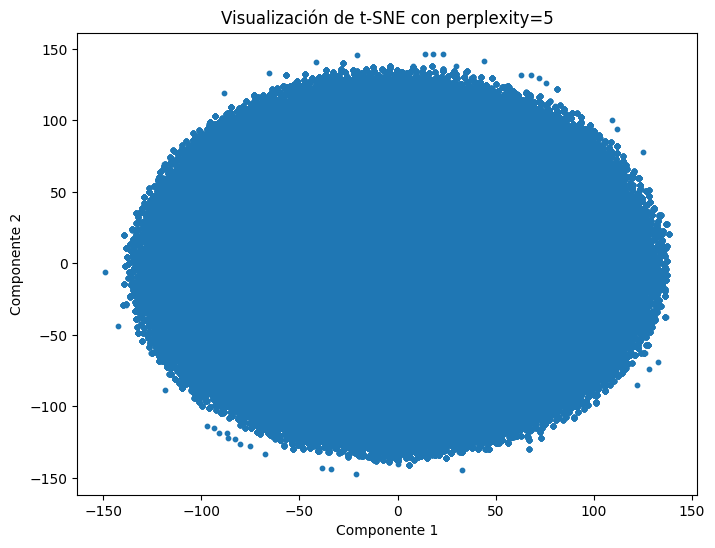

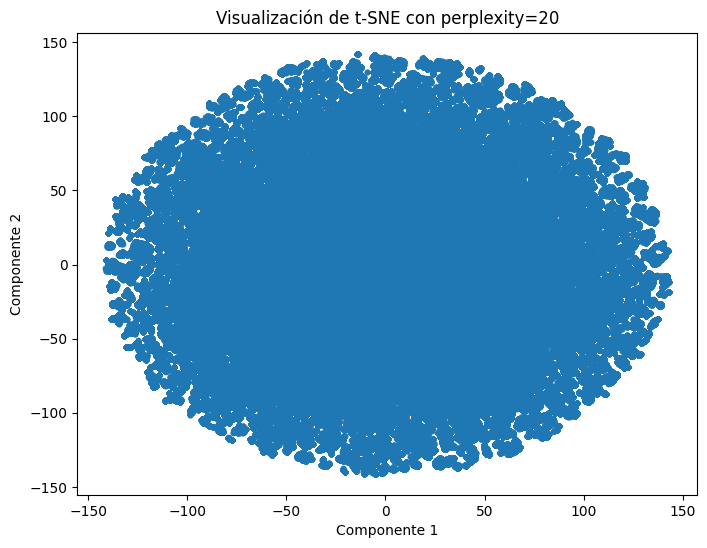

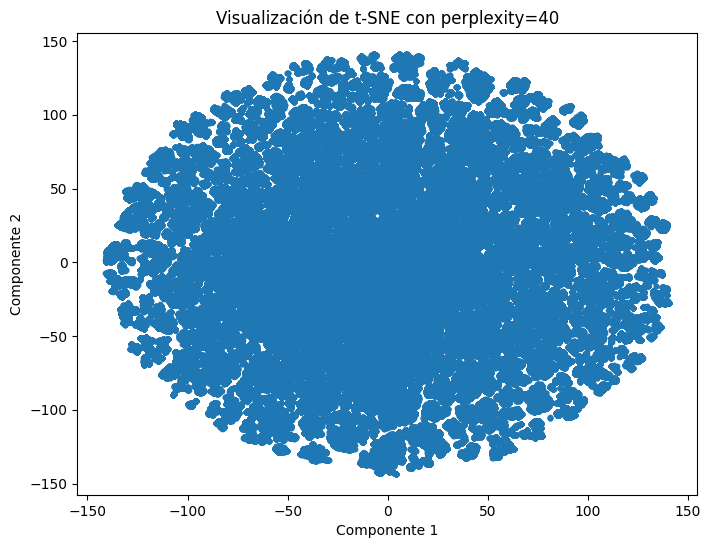

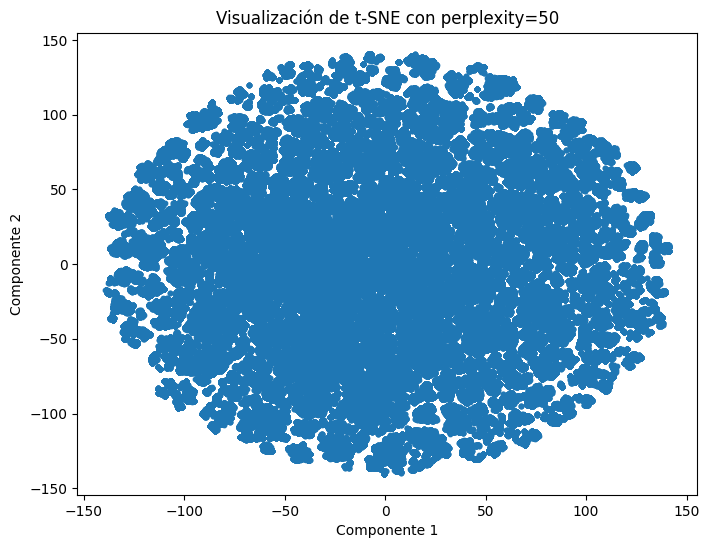

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Codificar variables categóricas con LabelEncoder
label_encoder = LabelEncoder()
for column in ['TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA', 'PUEBLOS_NACIONALIDAD',
               'DISCAPACIDAD', 'PAIS_NACIONALIDAD', 'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
               'CANTON_RESIDENCIA', 'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO',
               'CAMPO_ESPECIFICO', 'NIVEL_FORMACIÓN', 'MODALIDAD']:
    df_reduced[column] = label_encoder.fit_transform(df_reduced[column])

# Escalar los datos numéricos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)

# Probar con diferentes valores de perplexity
perplexity_values = [5, 20, 40, 50]

for perplexity in perplexity_values:
    # Aplicar t-SNE con diferentes valores de perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)

    # Graficar los resultados de t-SNE
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10)
    plt.title(f"Visualización de t-SNE con perplexity={perplexity}")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()



In [82]:
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset reducido
df = df_reduced.copy()

# Selección de todas las variables categóricas excepto 'tot'
variables_seleccionadas = ['AÑO', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA', 
                           'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD', 'PAIS_NACIONALIDAD', 
                           'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA', 'CANTON_RESIDENCIA', 
                           'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO', 
                           'NIVEL_FORMACIÓN', 'MODALIDAD']

# Aplicar Label Encoding a las variables categóricas seleccionadas
label_encoders = {}
for col in variables_seleccionadas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Preparar los datos para clustering
X = df[variables_seleccionadas + ['tot']]  # Incluimos 'tot' en el dataset pero no la codificamos

# Visualizar los primeros datos codificados
X.head()


Index(['AÑO', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA',
       'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD', 'PAIS_NACIONALIDAD',
       'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA', 'CANTON_RESIDENCIA',
       'NOMBRE_IES', 'TIPO_FINANCIAMIENTO', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO',
       'NIVEL_FORMACIÓN', 'MODALIDAD', 'tot'],
      dtype='object')

In [84]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalizar los datos (escalado estándar para poner los valores en la misma escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos normalizados, incluyendo 'tot' en la salida
print(pd.DataFrame(X_scaled, columns=variables_seleccionadas + ['tot']).head())


       AÑO  TIPO_SEDE  PROVINCIA_SEDE      SEXO     ETNIA  \
0 -1.27974   0.361318        1.203635 -1.059522 -0.069802   
1 -1.27974   0.361318        1.203635 -1.059522 -0.069802   
2 -1.27974   0.361318        1.203635 -1.059522 -0.069802   
3 -1.27974   0.361318        1.203635 -1.059522  1.467616   
4 -1.27974   0.361318        1.203635  0.943821 -0.069802   

   PUEBLOS_NACIONALIDAD  DISCAPACIDAD  PAIS_NACIONALIDAD  PAIS_RESIDENCIA  \
0              0.003739     -6.205277          -0.093547         -0.09992   
1              0.003739      0.140995          -0.093547         -0.09992   
2              0.003739      0.140995          -0.093547         10.00798   
3              0.003739      0.140995          -0.093547         -0.09992   
4              0.003739      0.140995          -0.093547         -0.09992   

   PROVINCIA_RESIDENCIA  CANTON_RESIDENCIA  NOMBRE_IES  TIPO_FINANCIAMIENTO  \
0              1.161916           0.885315   -1.740955             0.742422   
1           

In [61]:
import hdbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicar PCA primero
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Luego aplicar t-SNE para reducir aún más la dimensionalidad
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_pca)

# Aplicar HDBSCAN nuevamente después de t-SNE
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=50, metric='hamming', cluster_selection_method='leaf')
cluster_labels = clusterer.fit_predict(X_tsne)

# Ver cuántos clusters y cuánto ruido se genera después de t-SNE
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_ruido = (cluster_labels == -1).sum()
print(f"Número de clusters: {n_clusters}, Número de puntos clasificados como ruido: {n_ruido}")

#Número de clusters: 6, Número de puntos clasificados como ruido: 220159

Número de clusters: 6, Número de puntos clasificados como ruido: 220159


In [62]:
import hdbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicar PCA primero
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Luego aplicar t-SNE para reducir aún más la dimensionalidad
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_pca)

# Aplicar HDBSCAN nuevamente después de t-SNE
clusterer = hdbscan.HDBSCAN(min_cluster_size=1500, min_samples=50, metric='hamming', cluster_selection_method='leaf')
cluster_labels = clusterer.fit_predict(X_tsne)

# Ver cuántos clusters y cuánto ruido se genera después de t-SNE
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_ruido = (cluster_labels == -1).sum()
print(f"Número de clusters: {n_clusters}, Número de puntos clasificados como ruido: {n_ruido}")


Número de clusters: 5, Número de puntos clasificados como ruido: 200446


In [70]:
import hdbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicar PCA primero
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Luego aplicar t-SNE para reducir aún más la dimensionalidad
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_pca)

# Aplicar HDBSCAN nuevamente después de t-SNE
clusterer = hdbscan.HDBSCAN(min_cluster_size=2000, min_samples=50, metric='hamming', cluster_selection_method='leaf')
cluster_labels = clusterer.fit_predict(X_tsne)

# Ver cuántos clusters y cuánto ruido se genera después de t-SNE
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_ruido = (cluster_labels == -1).sum()
print(f"Número de clusters: {n_clusters}, Número de puntos clasificados como ruido: {n_ruido}")

#pca_components = 5
#Número de clusters: 4, Número de puntos clasificados como ruido: 71048   min_cluster_size=2000
#Número de clusters: 4, Número de puntos clasificados como ruido: 118462  min_cluster_size=3000

#pca_components = 4
#Número de clusters: 4, Número de puntos clasificados como ruido: 173360 min_cluster_size=2000


#pca_components = 6
#Número de clusters: 4, Número de puntos clasificados como ruido: 310409   min_cluster_size=2000

Número de clusters: 4, Número de puntos clasificados como ruido: 146761


c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Número de clusters (excluyendo el ruido): 34
Cluster 0: 3739 registros
Cluster 1: 5205 registros
Cluster 2: 19727 registros
Cluster 3: 3353 registros
Cluster 4: 4149 registros
Cluster 5: 2626 registros
Cluster 6: 4512 registros
Cluster 7: 5526 registros
Cluster 8: 3191 registros
Cluster 9: 3208 registros
Cluster 10: 3129 registros
Cluster 11: 3695 registros
Cluster 12: 7788 registros
Cluster 13: 4668 registros
Cluster 14: 2572 registros
Cluster 15: 7554 registros
Cluster 16: 3772 registros
Cluster 17: 8573 registros
Cluster 18: 3534 registros
Cluster 19: 3318 registros
Cluster 20: 6007 registros
Cluster 21: 4956 registros
Cluster 22: 6078 registros
Cluster 23: 8570 registros
Cluster 24: 3492 registros
Cluster 25: 2617 registros
Cluster 26: 3990 registros
Cluster 27: 5519 registros
Cluster 28: 16702 registros
Cluster 29: 7875 registros
Cluster 30: 9452 registros
Cluster 31: 2897 registros
Cluster 32: 4590 registros
Cluster 33: 6015 registros


C:\Users\luis.baca\AppData\Local\Temp\ipykernel_45376\2312510705.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


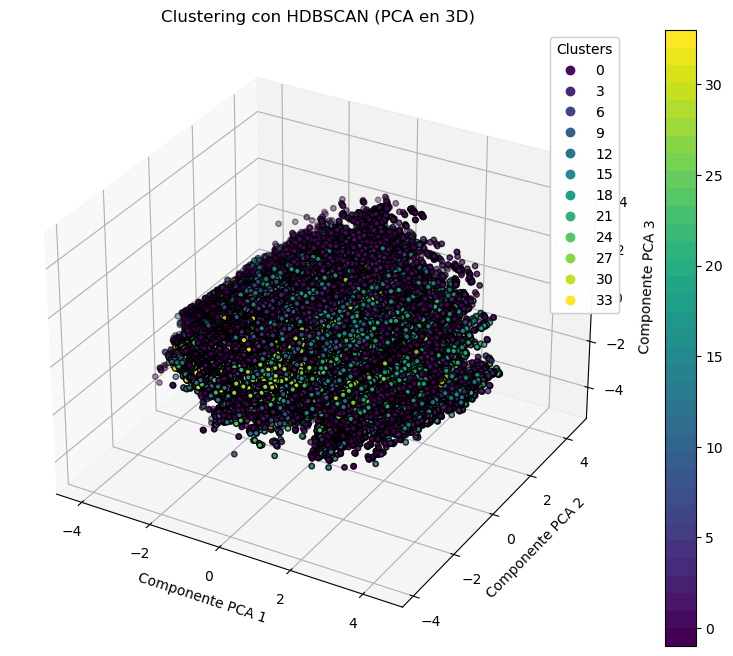

In [111]:
from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap

# Verificar que la columna 'tot' no esté incluida en el conjunto X_scaled
X_scaled = scaler.fit_transform(df.drop(columns=['tot']))

# Aplicar PCA para reducir las dimensiones a 10 (para capturar más variabilidad)


# Aplicar UMAP en lugar de PCA para reducción de dimensionalidad a 3 dimensiones
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Aplicar HDBSCAN para encontrar los clusters con métricas y parámetros ajustados
clusterer = hdbscan.HDBSCAN(min_cluster_size=2500, min_samples=20, metric='manhattan', cluster_selection_epsilon=0.2)
clusters = clusterer.fit_predict(X_umap)

# Imprimir el número de clusters y la cantidad de registros agrupados en cada cluster
clusters_unique, counts = np.unique(clusters[clusters != -1], return_counts=True)
print(f"Número de clusters (excluyendo el ruido): {len(clusters_unique)}")

for cluster, count in zip(clusters_unique, counts):
    print(f"Cluster {cluster}: {count} registros")

# Crear la figura para el gráfico 3D con las primeras tres componentes del PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores de los clusters
unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

# Graficar los puntos de datos en 3D, asignando un color especial al ruido (cluster -1)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap=colors, edgecolors='k', marker='o', s=15)

# Añadir leyenda para los clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Etiquetas de los ejes
ax.set_title('Clustering con HDBSCAN (PCA en 3D)')
ax.set_xlabel('Componente PCA 1')
ax.set_ylabel('Componente PCA 2')
ax.set_zlabel('Componente PCA 3')

# Mostrar el gráfico con los puntos más definidos y leyenda
plt.colorbar(scatter)
plt.show()



In [ ]:
import hdbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicar PCA primero
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Luego aplicar t-SNE para reducir aún más la dimensionalidad
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_pca)

# Aplicar HDBSCAN nuevamente después de t-SNE
clusterer = hdbscan.HDBSCAN(min_cluster_size=1500, min_samples=50, metric='hamming', cluster_selection_method='leaf')
cluster_labels = clusterer.fit_predict(X_tsne)

# Ver cuántos clusters y cuánto ruido se genera después de t-SNE
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_ruido = (cluster_labels == -1).sum()
print(f"Número de clusters: {n_clusters}, Número de puntos clasificados como ruido: {n_ruido}")

In [42]:
import hdbscan
from sklearn.decomposition import PCA

# Probar con diferentes valores de n_components
for n in range(3, 7):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    # Aplicar HDBSCAN nuevamente
    clusterer = hdbscan.HDBSCAN(min_cluster_size=1500, min_samples=50, metric='hamming', cluster_selection_method='leaf')
    cluster_labels = clusterer.fit_predict(X_pca)

    # Ver cuántos clusters y cuánto ruido se genera
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_ruido = (cluster_labels == -1).sum()
    print(f"Número de clusters: {n_clusters}, Número de puntos clasificados como ruido: {n_ruido}")





Número de clusters: 5, Número de puntos clasificados como ruido: 98928
Número de clusters: 4, Número de puntos clasificados como ruido: 315280


In [28]:
# Extraer los puntos clasificados como ruido (-1)
df_ruido = df[cluster_labels == -1]

# Ver algunas estadísticas de los puntos clasificados como ruido
print(df_ruido.describe())


                AÑO     TIPO_SEDE  PROVINCIA_SEDE          SEXO         ETNIA  \
count  50398.000000  50398.000000    50398.000000  50398.000000  50398.000000   
mean    2021.030100      0.862475       11.428965      0.538196      3.055657   
std        0.763569      0.344404        5.579179      0.498544      1.369542   
min     2020.000000      0.000000        0.000000      0.000000      0.000000   
25%     2020.000000      1.000000        9.000000      0.000000      3.000000   
50%     2021.000000      1.000000       11.000000      1.000000      3.000000   
75%     2022.000000      1.000000       18.000000      1.000000      3.000000   
max     2022.000000      1.000000       22.000000      1.000000      6.000000   

       CAMPO_AMPLIO  NIVEL_FORMACIÓN     MODALIDAD           tot  
count  50398.000000     50398.000000  50398.000000  50398.000000  
mean       5.035021         0.874658      3.072066      6.028136  
std        2.570633         0.362848      1.555122     32.473209  
mi

In [ ]:
for cluster in df_reduced["cluster_hdbscan"].unique():
    print(f"Perfil del Cluster {cluster}:\n")
    print(df_reduced[df_reduced["cluster_hdbscan"] == cluster].describe(include="all"))
    print("\n" + "-"*50 + "\n")


Perfil del Cluster 249:

               AÑO  TIPO_SEDE  PROVINCIA_SEDE        SEXO       ETNIA  \
count   833.000000      833.0      833.000000  833.000000  833.000000   
mean   2021.004802        1.0       18.110444    0.536615    4.259304   
std       0.820399        0.0        0.313631    0.498957    2.239825   
min    2020.000000        1.0       18.000000    0.000000    0.000000   
25%    2020.000000        1.0       18.000000    0.000000    3.000000   
50%    2021.000000        1.0       18.000000    1.000000    6.000000   
75%    2022.000000        1.0       18.000000    1.000000    6.000000   
max    2022.000000        1.0       19.000000    1.000000    6.000000   

       PUEBLOS_NACIONALIDAD  DISCAPACIDAD  PAIS_NACIONALIDAD  PAIS_RESIDENCIA  \
count            833.000000    833.000000         833.000000       833.000000   
mean              16.900360      4.923169          36.423770         0.001200   
std                1.045095      0.549347           5.894445         0.034

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Removemos los puntos asignados como ruido (-1 en HDBSCAN)
mask = cluster_labels != -1
if mask.sum() > 0:
    silhouette_avg = silhouette_score(X_scaled[mask], cluster_labels[mask])
    calinski_harabasz = calinski_harabasz_score(X_scaled[mask], cluster_labels[mask])
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz}")
else:
    print("No se generaron clusters útiles, todos los puntos fueron considerados ruido.")


KeyboardInterrupt: 